In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import files

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#crisis_df = pd.read_csv('/content/drive/MyDrive/CS Project/Crisis.csv')

In [6]:
dfMPF = pd.read_csv('/content/drive/MyDrive/CS_project/MPF_CRISIS.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (129) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
##Some configuration settings
%matplotlib inline
pd.set_option("display.max_rows", 100)

In [8]:
dfMPF.columns

Index(['id', 'country', 'code', 'year', 'bankcrsis', 'currcrsis', 'sovcrsis',
       'multicrsis', 'fincrisis', 'incomgrp',
       ...
       'partdmgusd', 'eduexpend', 'domhealthcap', 'exthealthcap',
       'domprivhealthcap', 'exthealthexp', 'outpockethealth', 'basicwaterwdi',
       'basicsanitwdi', 'netodausd15'],
      dtype='object', length=201)

In [9]:
dfMPF2 = dfMPF.drop('id', 1)


In [10]:
dfMPF2.head()

,country,code,year,bankcrsis,currcrsis,sovcrsis,multicrsis,fincrisis,incomgrp,empplf,empplm,emppl,popipl,pg190,pg320,pg550,pgnpl,head190,head320,head550,headnpl,rurlpgpl,rurlhdpl,urbnpgpl,urbnhdpl,ruralgrow,urbangrow,sanit,water,xedugov,xedugdp,elctric,rurlctric,urblctric,adlout,adloutf,adloutm,childout,childoutf,childoutm,...,urban,inflatgdp,inflatcpi,gds,gs,exp,gcf,forestloss,healthexp,domhealthexp,healthexpcap,birthattd,hospital,nurses,doctor,prenatal,poptotal,nrgusecap,nrgusegdp,indva,consume,fuelexp,manufexp,agrirawexp,indvaw,netodausd,netodacap,foodexp,foodimp,co2dmgusd,partdmgusd,eduexpend,domhealthcap,exthealthcap,domprivhealthcap,exthealthexp,outpockethealth,basicwaterwdi,basicsanitwdi,netodausd15
0,Albania,ALB,1980,0,0,0,0,0,uprmid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.653196,2.827020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,902120.0,NaN,NaN,34.953663,NaN,99.593899,34.547561,NaN,NaN,NaN,NaN,NaN,4.2717,NaN,1.367,NaN,2671997.0,1149.536096,NaN,44.999999,65.046336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22477779.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,1981,0,0,0,0,0,uprmid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.606684,2.775926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,927513.0,-2.177360,NaN,36.589313,NaN,98.532321,35.121012,NaN,NaN,NaN,NaN,NaN,4.1871,NaN,NaN,NaN,2726056.0,989.200148,NaN,43.000062,63.410687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35941761.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,ALB,1982,0,0,0,0,0,uprmid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.713851,2.883273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,954645.0,-0.017694,NaN,33.414529,NaN,104.502538,37.917069,NaN,NaN,NaN,NaN,NaN,4.1607,NaN,NaN,NaN,2784278.0,966.683284,NaN,43.800170,66.585471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39139816.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,1983,0,0,0,0,0,uprmid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.716783,2.890837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,982645.0,-0.016747,NaN,33.462092,NaN,102.612414,36.073906,NaN,NaN,NaN,NaN,NaN,4.0862,NaN,1.415,NaN,2843960.0,1000.122013,NaN,43.300050,66.537908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43756127.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,ALB,1984,0,0,0,0,0,uprmid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.698212,2.867972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1011235.0,-0.028354,NaN,29.817080,30.321175,101.964264,31.780739,NaN,NaN,NaN,NaN,NaN,4.1390,NaN,1.407,NaN,2904429.0,1018.263142,NaN,43.999999,70.182920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47856439.49,NaN,53968388.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dfMPF2 = dfMPF2.drop('country', 1)


In [12]:
dfMPF2 = dfMPF2.drop('code', 1)


In [13]:
dfMPF2 = dfMPF2.drop('water', 1)

In [14]:
dfMPF2.shape


(5400, 197)

In [15]:
corr_matrix = dfMPF2.corr().abs()

In [16]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
dfMPF2.drop(to_drop, axis=1, inplace=True)

In [17]:
dfMPF2.shape

(5400, 162)

In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.DataFrame( dfMPF2.isnull().sum(), columns= ['Number of missing values'])


,Number of missing values
year,0
bankcrsis,0
currcrsis,0
sovcrsis,0
multicrsis,0
fincrisis,0
incomgrp,0
empplf,4913
pgnpl,5123
headnpl,4698


In [19]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [20]:
print(dfMPF2.shape)

(5400, 162)


In [21]:
print(list(dfMPF2.columns))

['year', 'bankcrsis', 'currcrsis', 'sovcrsis', 'multicrsis', 'fincrisis', 'incomgrp', 'empplf', 'pgnpl', 'headnpl', 'rurlhdpl', 'urbnpgpl', 'urbnhdpl', 'ruralgrow', 'urbangrow', 'sanit', 'xedugov', 'xedugdp', 'elctric', 'urblctric', 'adlout', 'childout', 'labpartf', 'undrnour', 'agrindx', 'flowagri', 'agriland', 'agricci', 'xagri', 'xagrfrfs', 'odabio', 'treearea', 'frstrent', 'nfrstdepl', 'nfrstco2', 'envprot', 'dafrst', 'affva', 'affvaw', 'edundx', 'renuelct', 'renunrg', 'nrgint', 'co2dmg', 'ch4emis', 'nrgdepl', 'partdmg', 'gdp', 'gdpcap', 'unemp', 'unempf', 'agriemp', 'vulnemp', 'mva', 'indemp', 'co2gdp', 'co2cap', 'resrent', 'xforstrt', 'export', 'import', 'fdi', 'debt2x', 'gini', 'ppgdbtgdp', 'pngdbtgdp', 'gdpgap', 'xrate', 'extdebt', 'debtpng', 'debtppg', 'concess', 'forgive', 'tds', 'tdsppg', 'tdspng', 'intpay', 'intpng', 'intppg', 'ppgdbtsv', 'mltidbtsv', 'npl', 'resrv', 'intrt', 'grant', 'intoff', 'intpriv', 'tenor', 'stdebt', 'intarr', 'prinarr', 'netoda', 'fnassacq', 'claimb

In [22]:
dfMPF2['bankcrsis'].value_counts()

0    4923
1     477
Name: bankcrsis, dtype: int64

In [23]:
# dfMPF2.corr()

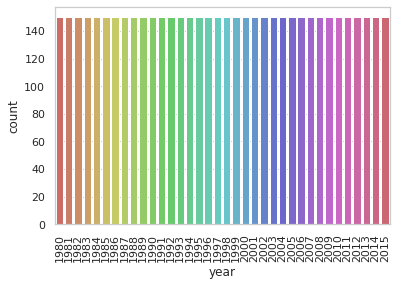

In [24]:
# total number of cases by country
sns.countplot(x='year', data=dfMPF2, palette ='hls')
plt.xticks(rotation=90)
plt.show()

In [25]:
# Drop the categorical variables which are not useful to the dataset for logistic regression
#dfMPF2 = dfMPF2.drop(['country', 'year'], axis =1)
#df.head()

In [26]:
# check systemic_crisis
# sns.countplot(x='systemic_crisis', data=df, palette ='hls')
# plt.xticks(rotation=90)
# plt.show()

In [27]:
# sns.countplot(x='currency_crises', data=df, palette ='hls')
# plt.xticks(rotation=90)
# plt.show()

In [28]:
# sns.countplot(x='inflation_crises', data=df, palette ='hls')
# plt.xticks(rotation=90)
# plt.show()

In [29]:
# sns.countplot(x='domestic_debt_in_default', data=df, palette ='hls')
# plt.xticks(rotation=90)
# plt.show()

In [30]:
# sns.countplot(x='sovereign_external_debt_default', data=df, palette ='hls')
# plt.xticks(rotation=90)
# plt.show()

In [31]:
# sns.countplot(x='gdp_weighted_default', data=df, palette ='hls')
# plt.xticks(rotation=90)
# plt.show()

In [32]:
# drop this column since it is not informative
#df = df.drop(['gdp_weighted_default'], axis =1)
#df.head()

In [33]:
dfMPF2['incomgrp'].replace({'uprmid': 0, 'lowmid': 1,'high': 2,'low': 3,}, inplace=True)


In [ ]:
dfMPF2.dtypes

In [35]:
dfMPF2.head()

,year,bankcrsis,currcrsis,sovcrsis,multicrsis,fincrisis,incomgrp,empplf,pgnpl,headnpl,rurlhdpl,urbnpgpl,urbnhdpl,ruralgrow,urbangrow,sanit,xedugov,xedugdp,elctric,urblctric,adlout,childout,labpartf,undrnour,agrindx,flowagri,agriland,agricci,xagri,xagrfrfs,odabio,treearea,frstrent,nfrstdepl,nfrstco2,envprot,dafrst,affva,affvaw,edundx,renuelct,renunrg,nrgint,co2dmg,ch4emis,nrgdepl,partdmg,gdp,gdpcap,unemp,unempf,agriemp,vulnemp,mva,indemp,co2gdp,co2cap,resrent,xforstrt,export,import,fdi,debt2x,gini,ppgdbtgdp,pngdbtgdp,gdpgap,xrate,extdebt,debtpng,debtppg,concess,forgive,tds,tdsppg,tdspng,intpay,intpng,intppg,ppgdbtsv,mltidbtsv,npl,resrv,intrt,grant,intoff,intpriv,tenor,stdebt,intarr,prinarr,netoda,fnassacq,claimbk,liquidity,gdpconst,cpi,rsvgrow,zscore,remit,gdpdef,realrate,tax,trade,popgrow,coalrent,gasrent,oilrent,minrent,dirtyrent,fishstock,terrprot,lifeexp,agrilandkm,agedep,arable,aquacul,capfish,fisheries,crop,livestock,food,matmort,infmort,cropland,popdens,ruralpct,rural,urban,inflatgdp,inflatcpi,gds,gs,exp,gcf,forestloss,healthexp,domhealthexp,healthexpcap,birthattd,hospital,nurses,doctor,prenatal,nrgusecap,indva,fuelexp,manufexp,agrirawexp,indvaw,netodausd,netodacap,foodexp,foodimp,co2dmgusd,partdmgusd,exthealthcap,domprivhealthcap,exthealthexp,outpockethealth,basicwaterwdi,netodausd15
0,1980,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.653196,2.827020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.802920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.862392,NaN,NaN,NaN,NaN,NaN,NaN,2228.41,NaN,NaN,6.296976e+09,2110.63,NaN,NaN,NaN,NaN,NaN,NaN,0.916814,1.935058,NaN,NaN,23.115588,22.709487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.514,NaN,NaN,NaN,NaN,6.259,NaN,NaN,45.825075,2.047964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11180.0,70.213117,21.350365,339.0,8661.0,9000.0,80.27,42.70,57.75,NaN,65.0,4.270073,97.518139,66.238,1769877.0,902120.0,NaN,NaN,34.953663,NaN,99.593899,34.547561,NaN,NaN,NaN,NaN,NaN,4.2717,NaN,1.367,NaN,1149.536096,44.999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22477779.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.606684,2.775926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.729927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.331610,NaN,NaN,NaN,NaN,NaN,NaN,2235.50,NaN,NaN,6.658778e+09,2187.64,NaN,NaN,NaN,NaN,NaN,NaN,1.231016,2.693024,NaN,NaN,22.982642,21.514963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329.270,NaN,NaN,NaN,NaN,7.161,NaN,NaN,44.497606,2.002974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11160.0,68.895135,21.459854,455.0,8921.0,9376.0,83.95,44.75,59.63,NaN,60.3,4.306569,99.491095,65.976,1798543.0,927513.0,-2.177360,NaN,36.589313,NaN,98.532321,35.121012,NaN,NaN,NaN,NaN,NaN,4.1871,NaN,NaN,NaN,989.200148,43.000062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35941761.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.713851,2.883273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.021967,NaN,NaN,NaN,NaN,NaN,NaN,2245.35,NaN,NaN,6.855118e+09,2205.05,NaN,NaN,NaN,NaN,NaN,NaN,1.190383,2.624857,NaN,NaN,19.375001,23.877538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338.819,NaN,NaN,NaN,NaN,7.296,NaN,NaN,43.252539,2.113272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11140.0,67.760839,21.496350,699.0,8812.0,9511.0,88.22,44.94,62.05,NaN,56.1,4.379562,101.615985,65.713,1829633.0,954645.0,-0.017694,NaN,33.414529,NaN,104.502538,37.917069,NaN,NaN,NaN,NaN,NaN,4.1607,NaN,NaN,NaN,966.683284,43.800170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39139816.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.716783,2.890837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.510949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.083577,NaN,NaN,NaN,NaN,NaN,NaN,2306.81,NaN,NaN,6.930863e+09,2182.63,

In [36]:
dfMPF2['bankcrsis'].value_counts()

0    4923
1     477
Name: bankcrsis, dtype: int64

In [37]:
dfMPF2.shape

(5400, 162)

In [38]:
pd.DataFrame( dfMPF2.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
year,0
bankcrsis,0
currcrsis,0
sovcrsis,0
multicrsis,0
fincrisis,0
incomgrp,0
empplf,4913
pgnpl,5123
headnpl,4698


In [39]:
 #dfMPF3 = dfMPF2.dropna(axis='columns', thresh=2000, how="any")
# (5400, 134)

In [40]:
#dfMPF3 = dfMPF2.dropna(axis='columns', thresh=1000, how="any")
#(5400, 152)

In [41]:
#dfMPF3 = dfMPF2.dropna(axis='columns', thresh=3000, how="any")
#(5400, 107)

In [42]:
dfMPF3 = dfMPF2.dropna(axis='columns', thresh=4000, how="any")
#(5400, 54)

In [43]:
dfMPF3.shape

(5400, 54)

In [44]:
pd.DataFrame( dfMPF3.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
year,0
bankcrsis,0
currcrsis,0
sovcrsis,0
multicrsis,0
fincrisis,0
incomgrp,0
ruralgrow,18
urbangrow,4
agriland,366


In [45]:
dfMPF3.head()

,year,bankcrsis,currcrsis,sovcrsis,multicrsis,fincrisis,incomgrp,ruralgrow,urbangrow,agriland,frstrent,co2dmg,ch4emis,gdp,gdpcap,mva,co2gdp,co2cap,resrent,xforstrt,export,import,fdi,ppgdbtgdp,pngdbtgdp,xrate,gdpconst,cpi,remit,gdpdef,trade,popgrow,agrilandkm,agedep,arable,aquacul,capfish,fisheries,crop,livestock,food,infmort,cropland,popdens,ruralpct,rural,urban,inflatgdp,inflatcpi,gds,exp,gcf,indva,co2dmgusd
0,1980,0,0,0,0,0,0,1.653196,2.827020,40.802920,NaN,NaN,2228.41,6.296976e+09,2110.63,NaN,0.916814,1.935058,NaN,NaN,23.115588,22.709487,NaN,NaN,NaN,NaN,311.514,NaN,NaN,6.259,45.825075,2.047964,11180.0,70.213117,21.350365,339.0,8661.0,9000.0,80.27,42.70,57.75,65.0,4.270073,97.518139,66.238,1769877.0,902120.0,NaN,NaN,34.953663,99.593899,34.547561,44.999999,22477779.58
1,1981,0,0,0,0,0,0,1.606684,2.775926,40.729927,NaN,NaN,2235.50,6.658778e+09,2187.64,NaN,1.231016,2.693024,NaN,NaN,22.982642,21.514963,NaN,NaN,NaN,NaN,329.270,NaN,NaN,7.161,44.497606,2.002974,11160.0,68.895135,21.459854,455.0,8921.0,9376.0,83.95,44.75,59.63,60.3,4.306569,99.491095,65.976,1798543.0,927513.0,-2.177360,NaN,36.589313,98.532321,35.121012,43.000062,35941761.06
2,1982,0,0,0,0,0,0,1.713851,2.883273,40.656934,NaN,NaN,2245.35,6.855118e+09,2205.05,NaN,1.190383,2.624857,NaN,NaN,19.375001,23.877538,NaN,NaN,NaN,NaN,338.819,NaN,NaN,7.296,43.252539,2.113272,11140.0,67.760839,21.496350,699.0,8812.0,9511.0,88.22,44.94,62.05,56.1,4.379562,101.615985,65.713,1829633.0,954645.0,-0.017694,NaN,33.414529,104.502538,37.917069,43.800170,39139816.47
3,1983,0,0,0,0,0,0,1.716783,2.890837,40.510949,NaN,NaN,2306.81,6.930863e+09,2182.63,NaN,1.229360,2.683240,NaN,NaN,18.196604,20.809018,NaN,NaN,NaN,NaN,342.546,NaN,NaN,7.792,39.005622,2.120885,11100.0,66.765179,21.496350,1162.0,8653.0,9815.0,98.74,45.44,67.56,52.3,4.416058,103.794161,65.448,1861315.0,982645.0,-0.016747,NaN,33.462092,102.612414,36.073906,43.300050,43756127.29
4,1984,0,0,0,0,0,0,1.698212,2.867972,40.620438,1.55425,2.482898,2327.29,6.844117e+09,2110.44,NaN,1.276648,2.694291,17.685084,16.130834,17.413083,19.377347,NaN,NaN,NaN,NaN,349.397,NaN,NaN,8.333,36.790430,2.103937,11130.0,65.842563,21.496350,1197.0,6809.0,8006.0,90.23,44.17,62.82,48.9,4.525547,106.001058,65.183,1893194.0,1011235.0,-0.028354,NaN,29.817080,101.964264,31.780739,43.999999,47856439.49


In [46]:
dfMPF3.shape

(5400, 54)

In [47]:
dfMPF3.dtypes

year            int64
bankcrsis       int64
currcrsis       int64
sovcrsis        int64
multicrsis      int64
fincrisis       int64
incomgrp        int64
ruralgrow     float64
urbangrow     float64
agriland      float64
frstrent      float64
co2dmg        float64
ch4emis       float64
gdp           float64
gdpcap        float64
mva           float64
co2gdp        float64
co2cap        float64
resrent       float64
xforstrt      float64
export        float64
import        float64
fdi           float64
ppgdbtgdp     float64
pngdbtgdp     float64
xrate         float64
gdpconst      float64
cpi           float64
remit         float64
gdpdef         object
trade         float64
popgrow       float64
agrilandkm    float64
agedep        float64
arable        float64
aquacul       float64
capfish       float64
fisheries     float64
crop          float64
livestock     float64
food          float64
infmort       float64
cropland      float64
popdens       float64
ruralpct      float64
rural     

In [48]:
dfMPF3=dfMPF3.replace('--', np.nan)
dfMPF3["gdpdef"] = pd.to_numeric(dfMPF3["gdpdef"])


In [49]:
for name, values in dfMPF3.iteritems():    
    dfMPF3[name] = dfMPF3[name].fillna(dfMPF3[name].median())

In [50]:
#pd.DataFrame( dfMPF3.isnull().sum(), columns= ['Number of missing values'])

In [51]:
y = dfMPF3[['bankcrsis']]
y = pd.get_dummies(dfMPF3['bankcrsis'],drop_first=True)
#yd

In [52]:
# drop y column from the original dataframe
dfMPF3 = dfMPF3.drop(['bankcrsis'], axis =1)
dfMPF3.head()

,year,currcrsis,sovcrsis,multicrsis,fincrisis,incomgrp,ruralgrow,urbangrow,agriland,frstrent,co2dmg,ch4emis,gdp,gdpcap,mva,co2gdp,co2cap,resrent,xforstrt,export,import,fdi,ppgdbtgdp,pngdbtgdp,xrate,gdpconst,cpi,remit,gdpdef,trade,popgrow,agrilandkm,agedep,arable,aquacul,capfish,fisheries,crop,livestock,food,infmort,cropland,popdens,ruralpct,rural,urban,inflatgdp,inflatcpi,gds,exp,gcf,indva,co2dmgusd
0,1980,0,0,0,0,0,1.653196,2.827020,40.802920,0.496721,0.782501,2228.41,6.296976e+09,2110.63,13.361895,0.916814,1.935058,2.899134,0.583745,23.115588,22.709487,1.791715,52.849227,29.425,12.024031,311.514,72.354,1.12025,6.259,45.825075,2.047964,11180.0,70.213117,21.350365,339.0,8661.0,9000.0,80.27,42.70,57.75,65.0,4.270073,97.518139,66.238,1769877.0,902120.0,6.324345,6.102895,34.953663,99.593899,34.547561,44.999999,22477779.58
1,1981,0,0,0,0,0,1.606684,2.775926,40.729927,0.496721,0.782501,2235.50,6.658778e+09,2187.64,13.361895,1.231016,2.693024,2.899134,0.583745,22.982642,21.514963,1.791715,52.849227,29.425,12.024031,329.270,72.354,1.12025,7.161,44.497606,2.002974,11160.0,68.895135,21.459854,455.0,8921.0,9376.0,83.95,44.75,59.63,60.3,4.306569,99.491095,65.976,1798543.0,927513.0,-2.177360,6.102895,36.589313,98.532321,35.121012,43.000062,35941761.06
2,1982,0,0,0,0,0,1.713851,2.883273,40.656934,0.496721,0.782501,2245.35,6.855118e+09,2205.05,13.361895,1.190383,2.624857,2.899134,0.583745,19.375001,23.877538,1.791715,52.849227,29.425,12.024031,338.819,72.354,1.12025,7.296,43.252539,2.113272,11140.0,67.760839,21.496350,699.0,8812.0,9511.0,88.22,44.94,62.05,56.1,4.379562,101.615985,65.713,1829633.0,954645.0,-0.017694,6.102895,33.414529,104.502538,37.917069,43.800170,39139816.47
3,1983,0,0,0,0,0,1.716783,2.890837,40.510949,0.496721,0.782501,2306.81,6.930863e+09,2182.63,13.361895,1.229360,2.683240,2.899134,0.583745,18.196604,20.809018,1.791715,52.849227,29.425,12.024031,342.546,72.354,1.12025,7.792,39.005622,2.120885,11100.0,66.765179,21.496350,1162.0,8653.0,9815.0,98.74,45.44,67.56,52.3,4.416058,103.794161,65.448,1861315.0,982645.0,-0.016747,6.102895,33.462092,102.612414,36.073906,43.300050,43756127.29
4,1984,0,0,0,0,0,1.698212,2.867972,40.620438,1.554250,2.482898,2327.29,6.844117e+09,2110.44,13.361895,1.276648,2.694291,17.685084,16.130834,17.413083,19.377347,1.791715,52.849227,29.425,12.024031,349.397,72.354,1.12025,8.333,36.790430,2.103937,11130.0,65.842563,21.496350,1197.0,6809.0,8006.0,90.23,44.17,62.82,48.9,4.525547,106.001058,65.183,1893194.0,1011235.0,-0.028354,6.102895,29.817080,101.964264,31.780739,43.999999,47856439.49


In [53]:
dfMPF3.shape

(5400, 53)

In [54]:
dfMPF3['currcrsis'].value_counts()

0    5216
1     184
Name: currcrsis, dtype: int64

In [55]:
dfMPF3['sovcrsis'].value_counts()

0    5348
1      52
Name: sovcrsis, dtype: int64

In [56]:
dfMPF3['fincrisis'].value_counts()

0    4749
1     651
Name: fincrisis, dtype: int64

In [57]:
dfMPF3.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5400.0,1.997500e+03,1.038926e+01,1.980000e+03,1.988750e+03,1.997500e+03,2.006250e+03,2.015000e+03
currcrsis,5400.0,3.407407e-02,1.814363e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sovcrsis,5400.0,9.629630e-03,9.766610e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
multicrsis,5400.0,1.018519e-02,1.004157e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
fincrisis,5400.0,1.205556e-01,3.256402e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
incomgrp,5400.0,1.380000e+00,1.099617e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
ruralgrow,5400.0,5.742974e-01,3.672009e+00,-2.357563e+02,-3.570093e-01,6.315323e-01,1.826366e+00,1.091684e+01
urbangrow,5400.0,2.560873e+00,2.230925e+00,-7.115279e+00,9.851658e-01,2.361371e+00,3.948310e+00,4.893559e+01
agriland,5400.0,4.141665e+01,2.046831e+01,4.423077e-01,2.596661e+01,4.165448e+01,5.687885e+01,8.616730e+01
frstrent,5400.0,2.507094e+00,5.254344e+00,1.601630e-04,1.279728e-01,4.967214e-01,2.518540e+00,7.472978e+01


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count     5400.000000
mean       138.190342
std        863.735062
min          0.002000
25%         48.822250
50%         72.350000
75%         94.484250
max      21494.177000
Name: gdpdef, dtype: float64

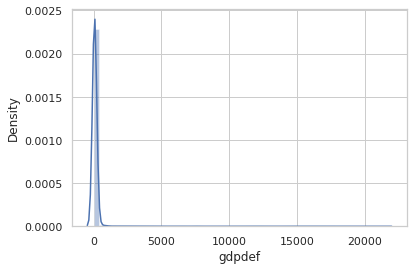

In [58]:
sns.distplot(dfMPF3['gdpdef'])
dfMPF3['gdpdef'].describe()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    5400.000000
mean        0.034074
std         0.181436
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: currcrsis, dtype: float64

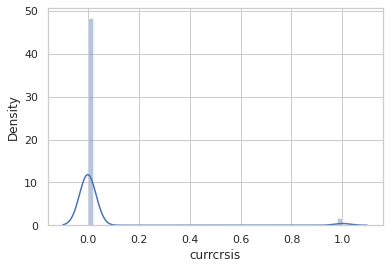

In [59]:

sns.distplot(dfMPF3['currcrsis'])
dfMPF3['currcrsis'].describe()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    5.400000e+03
mean     3.273078e+11
std      1.288485e+12
min      1.364508e+08
25%      8.122548e+09
50%      2.380082e+10
75%      1.460000e+11
max      1.860000e+13
Name: gdp, dtype: float64

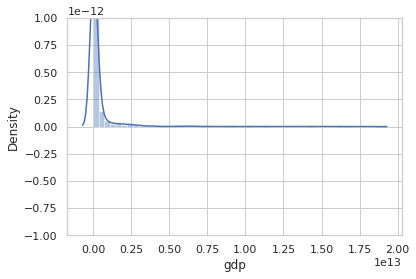

In [60]:
sns.distplot(dfMPF3['gdp'])
dfMPF3['gdp'].describe()

In [61]:
from sklearn import preprocessing

In [62]:
scaled_X=preprocessing.scale(dfMPF3)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [63]:

normalized_X=preprocessing.normalize(dfMPF3)

In [64]:
########

In [65]:
# split the data into test train sets
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3780, 53) (3780, 1)
(1620, 53) (1620, 1)


In [66]:
#y_test.head()

In [67]:
# fit a model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
#predictions
Predictions = logmodel.predict(X_test)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1475
           1       0.00      0.00      0.00       145

    accuracy                           0.91      1620
   macro avg       0.46      0.50      0.48      1620
weighted avg       0.83      0.91      0.87      1620



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
(y_test==0).sum()

1    1475
dtype: int64

In [71]:
(y_test==1).sum()

1    145
dtype: int64

In [72]:
125/1495

0.08361204013377926

# for scaled X

 precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       0.99      1.00      0.99        90

    accuracy                           1.00      1080
   macro avg       0.99      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080

# for normalizeded X

precision    recall  f1-score   support

           0       0.91      1.00      0.95       985
           1       0.00      0.00      0.00        95

    accuracy                           0.91      1080
   macro avg       0.46      0.50      0.48      1080
weighted avg       0.83      0.91      0.87      1080

In [73]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Predictions))

[[1475    0]
 [ 145    0]]


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1475
           1       0.00      0.00      0.00       145

    accuracy                           0.91      1620
   macro avg       0.46      0.50      0.48      1620
weighted avg       0.83      0.91      0.87      1620



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
# calculate the fpr and tpr for all thresholds of the classification
import sklearn.metrics as metrics
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

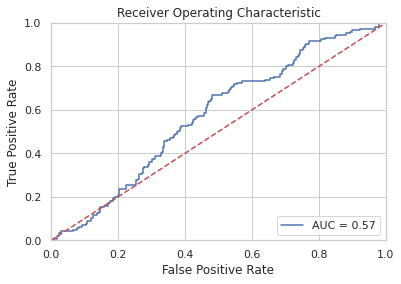

In [76]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Build KNN Model

In [77]:
#scaled_X=preprocessing.scale(dfMPF3)

In [78]:
# split the data into test train sets
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(dfMPF3, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4320, 53) (4320, 1)
(1080, 53) (1080, 1)


In [79]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [80]:
y_pred = classifier.predict(X_test)

In [81]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(classifier.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.92


In [82]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [83]:
print(confusion_matrix(y_test, y_pred))

[[959  18]
 [ 93  10]]


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       977
           1       0.36      0.10      0.15       103

    accuracy                           0.90      1080
   macro avg       0.63      0.54      0.55      1080
weighted avg       0.86      0.90      0.87      1080



In [85]:
#Comparing Error Rate with the K Value - KNN 91 % and Logistic Regression was 89%

In [86]:
y_test

,1
5251,0
1328,0
3707,0
4727,0
209,0
4086,0
2465,0
2072,0
3601,0
1032,0


In [87]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

Text(0, 0.5, 'Mean Error')

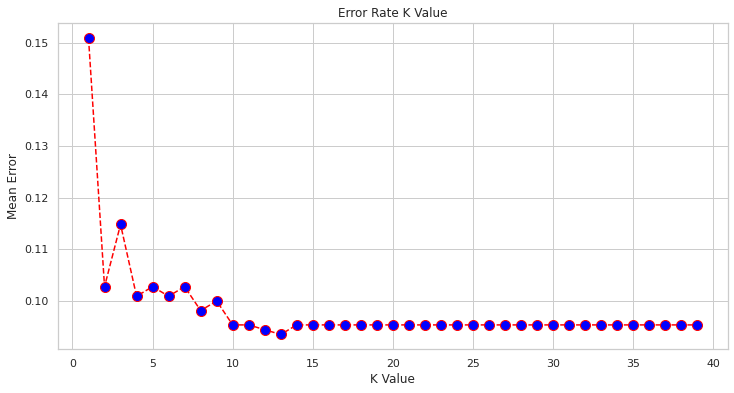

In [88]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

**Using Normalized value for KNN** 


normalized_X=preprocessing.normalize(dfMPF3)

In [89]:
normalized_X=preprocessing.normalize(dfMPF3)
# split the data into test train sets
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4320, 53) (4320, 1)
(1080, 53) (1080, 1)


In [90]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [91]:
y_pred = classifier.predict(X_test)

In [92]:
print('Accuracy of KNN classifier on train set: {:.2f}'.format(classifier.score(X_train, y_train)))

Accuracy of KNN classifier on train set: 0.92


In [93]:
print('Accuracy of KNN regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of KNN regression classifier on test set: 0.90


In [94]:
print(confusion_matrix(y_test, y_pred))

[[962  10]
 [ 97  11]]


In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       972
           1       0.52      0.10      0.17       108

    accuracy                           0.90      1080
   macro avg       0.72      0.55      0.56      1080
weighted avg       0.87      0.90      0.87      1080



In [96]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

Text(0, 0.5, 'Mean Error')

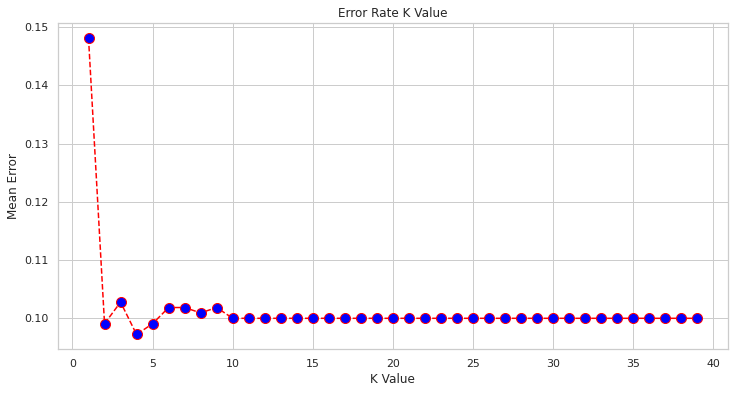

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Naive Bayes Classification

In [98]:
from sklearn.naive_bayes import GaussianNB

# **Using the same Xtrain values from KNN for Gaussian Naive Bayes Classifier and comparing the outputs.**

In [99]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred))

Accuracy on test set: 0.1574074074074074


Text(89.18, 0.5, 'predicted label')

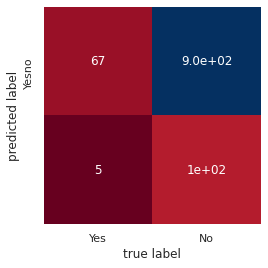

In [101]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,xticklabels=['Yes', 'No'], yticklabels=['Yes' 'no'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.07      0.13       972
           1       0.10      0.95      0.18       108

    accuracy                           0.16      1080
   macro avg       0.52      0.51      0.16      1080
weighted avg       0.85      0.16      0.13      1080



# Using Non Normalized values for Naive Bayes , Calculating the values from the Main Dataframe.


In [103]:
# split the data into test train sets
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(dfMPF3, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4320, 53) (4320, 1)
(1080, 53) (1080, 1)


In [104]:
print(X_train.shape, y_train.shape)

(4320, 53) (4320, 1)


In [105]:
print(y_train.describe)

<bound method NDFrame.describe of       1
1731  0
1185  0
3815  0
1726  0
4307  0
1114  0
5317  0
1027  0
2606  0
1887  0
3072  0
547   0
400   0
4111  0
1277  0
1074  0
3936  0
869   0
4342  0
3555  0
2769  0
4048  0
430   0
1252  1
5129  0
2986  0
995   0
2323  1
1699  0
4153  0
4803  0
1225  0
307   0
4790  0
3004  0
2791  0
2150  0
4855  0
703   0
1767  0
5325  0
3785  0
1498  0
247   0
1275  1
3669  0
4027  0
227   0
3253  0
2312  0
1169  1
5034  1
809   0
2288  0
2369  0
3544  0
3361  0
429   0
927   0
5309  0
5153  1
3696  0
4083  0
3202  0
3250  0
3999  0
2711  0
576   0
701   0
1310  0
4873  0
269   0
1510  0
5193  0
4105  0
3002  0
2187  0
5061  0
4711  0
4868  0
1652  0
1003  0
2428  0
184   0
1904  0
2794  0
3642  0
1432  0
1046  0
2388  0
358   0
1295  0
2245  0
1985  0
2418  1
5202  0
764   0
2598  0
2364  0
262   0
4766  1
3249  0
3844  0
1966  0
1583  0
970   0
314   0
3035  0
3075  0
593   0
4357  0
2394  0
4314  0
2327  0
260   0
1403  0
3733  0
3973  0
446   1
124   

In [106]:
print(X_test.shape, y_test.shape)

(1080, 53) (1080, 1)


In [107]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred))

Accuracy on test set: 0.899074074074074


Text(89.18, 0.5, 'predicted label')

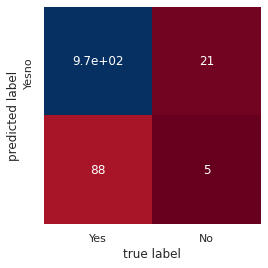

In [109]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,xticklabels=['Yes', 'No'], yticklabels=['Yes' 'no'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       987
           1       0.19      0.05      0.08        93

    accuracy                           0.90      1080
   macro avg       0.55      0.52      0.52      1080
weighted avg       0.85      0.90      0.87      1080



**Accuracy is 86% for Non Normalized values of Xtrain- The training set, But reduces to around 56% when you used normalized values of the training set.**

**Accuracy for Logistic Regression and KNN is around 92% when we use Normalized values for the data set .**

## So all 3 models more or less give the same accuracy with a variance of 5 to 8% for classifying the Banking crisis based on the given dataset.

In [111]:
# split the data into test train sets
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(dfMPF3, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4320, 53) (4320, 1)
(1080, 53) (1080, 1)


In [112]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [113]:
y_pred = classifier.predict(X_test)

In [114]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       980
           1       0.39      0.07      0.12       100

    accuracy                           0.90      1080
   macro avg       0.65      0.53      0.53      1080
weighted avg       0.86      0.90      0.87      1080



#SMOTE ANALYSIS OF KNN

In [115]:
pip install imbalanced-learn

In [116]:
from imblearn import over_sampling

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [117]:
from imblearn.over_sampling import SMOTE

In [118]:
from imblearn.over_sampling import ADASYN

In [119]:
#adapt = new ADASYN()

In [120]:
x_train_ada, y_train_ada = ADASYN().fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [121]:
from sklearn.neighbors import KNeighborsClassifier
classifierAda = KNeighborsClassifier(n_neighbors=5)
classifierAda.fit(x_train_ada, y_train_ada)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [122]:
y_pred_ada = classifierAda.predict(X_test)

In [123]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78       980
           1       0.15      0.57      0.24       100

    accuracy                           0.66      1080
   macro avg       0.54      0.62      0.51      1080
weighted avg       0.87      0.66      0.73      1080



In [124]:
#smt = SMOTE(kind='borderline2')

In [125]:
x_train_smt, y_train_smt = SMOTE(kind='svm').fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=F

In [126]:
#x_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [127]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_smt, y_train_smt)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [128]:
y_pred = classifier.predict(X_test)

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       980
           1       0.21      0.36      0.27       100

    accuracy                           0.82      1080
   macro avg       0.57      0.61      0.58      1080
weighted avg       0.86      0.82      0.84      1080



 ada - classificaiton report
 
 precision    recall  f1-score   support

           0       0.97      0.78      0.86       995
           1       0.21      0.69      0.32        85

    accuracy                           0.77      1080
   macro avg       0.59      0.74      0.59      1080
weighted avg       0.91      0.77      0.82      1080

smote with borderline2

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       995
           1       0.18      0.62      0.28        85

    accuracy                           0.74      1080
   macro avg       0.57      0.69      0.56      1080
weighted avg       0.90      0.74      0.80      1080


smote with borderline1

   precision    recall  f1-score   support

           0       0.96      0.82      0.88       995
           1       0.23      0.62      0.33        85

    accuracy                           0.80      1080
   macro avg       0.59      0.72      0.61      1080
weighted avg       0.90      0.80      0.84      1080

          smote with svm - not overfitted - not predicitng all values of 0 correctly & prediction of 1s has also improved

           precision    recall  f1-score   support

           0       0.96      0.85      0.90       995
           1       0.26      0.60      0.36        85

    accuracy                           0.83      1080
   macro avg       0.61      0.73      0.63      1080
weighted avg       0.91      0.83      0.86      1080

              # EMpty or Plain SMote
              
              
              precision    recall  f1-score   support

           0       0.97      0.80      0.87       995
           1       0.23      0.72      0.35        85

    accuracy                           0.79      1080
   macro avg       0.60      0.76      0.61      1080
weighted avg       0.91      0.79      0.83      1080





Text(89.18, 0.5, 'predicted label')

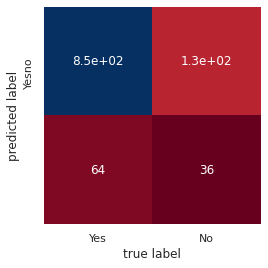

In [130]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,xticklabels=['Yes', 'No'], yticklabels=['Yes' 'no'])
plt.xlabel('true label')
plt.ylabel('predicted label')

         precision    recall  f1-score   support

           0       0.93      0.97      0.95       989
           1       0.35      0.16      0.22        91

    accuracy                           0.90      1080
   macro avg       0.64      0.57      0.59      1080
weighted avg       0.88      0.90      0.89      1080


# SMOTE Analysis of Naive Bayes

In [131]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train_smt, y_train_smt)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

Text(89.18, 0.5, 'predicted label')

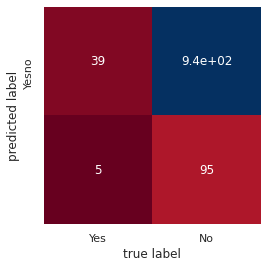

In [132]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,xticklabels=['Yes', 'No'], yticklabels=['Yes' 'no'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.04      0.08       980
           1       0.09      0.95      0.17       100

    accuracy                           0.12      1080
   macro avg       0.49      0.49      0.12      1080
weighted avg       0.81      0.12      0.08      1080



In [134]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train_smt, y_train_smt)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

Text(89.18, 0.5, 'predicted label')

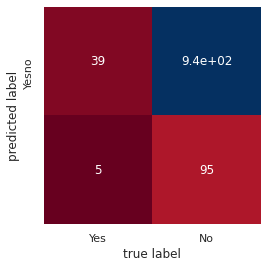

In [135]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,xticklabels=['Yes', 'No'], yticklabels=['Yes' 'no'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [136]:
# split the data into test train sets
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(dfMPF3, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4320, 53) (4320, 1)
(1080, 53) (1080, 1)


In [137]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       976
           1       0.45      0.10      0.16       104

    accuracy                           0.90      1080
   macro avg       0.68      0.54      0.55      1080
weighted avg       0.87      0.90      0.87      1080



### PCA

In [138]:
from scipy.stats import zscore
X_ZScaled = X_train.apply(zscore)
X_ZScaled.head()

,year,currcrsis,sovcrsis,multicrsis,fincrisis,incomgrp,ruralgrow,urbangrow,agriland,frstrent,co2dmg,ch4emis,gdp,gdpcap,mva,co2gdp,co2cap,resrent,xforstrt,export,import,fdi,ppgdbtgdp,pngdbtgdp,xrate,gdpconst,cpi,remit,gdpdef,trade,popgrow,agrilandkm,agedep,arable,aquacul,capfish,fisheries,crop,livestock,food,infmort,cropland,popdens,ruralpct,rural,urban,inflatgdp,inflatcpi,gds,exp,gcf,indva,co2dmgusd
1572,0.628106,-0.191617,-0.10144,-0.103744,-0.369113,-0.347580,0.144911,-1.078144,1.453876,-0.142145,-0.381679,-0.313756,-0.246947,-0.387487,3.456744,-0.423598,-0.557271,-0.379314,-0.329226,1.697358,1.418387,-0.097957,-0.187794,-0.356684,-0.015220,-0.134299,-0.060159,-0.043369,-0.133033,1.685600,-0.650729,-0.385545,0.735459,-0.335271,-0.101198,-0.357300,-0.219968,0.232046,0.025971,0.223441,1.013999,-0.473326,-0.272834,1.320450,-0.216497,-0.332924,-0.071439,-0.064369,-0.736662,0.046268,-0.412136,1.273482,-0.180961
1558,-0.720942,-0.191617,-0.10144,-0.103744,-0.369113,-0.347580,1.294927,1.256253,1.493632,0.521298,-0.588546,-0.314330,-0.248045,-0.422599,3.026113,-0.607093,-0.657600,-0.072269,-0.405648,1.221548,1.142608,-0.073701,-0.187794,-0.356684,-0.015220,-0.134317,-0.060159,0.623724,-0.144611,1.286169,1.343408,-0.385318,1.688261,-0.326583,-0.102516,-0.357296,-0.219954,0.248493,-0.087253,0.014660,0.220409,-0.494401,-0.384222,1.408905,-0.218395,-0.334323,-0.023645,-0.048153,-0.886092,0.214805,-0.857189,0.976445,-0.182150
4880,0.242664,-0.191617,-0.10144,-0.103744,-0.369113,-0.347580,-0.389486,-0.418863,0.980775,-0.451234,0.071437,-0.265160,-0.223842,-0.403759,0.414940,0.246402,-0.307525,-0.334348,-0.070262,0.256897,0.069617,0.028278,-0.062940,-0.356684,-0.015220,-0.134270,-0.060159,0.023765,-0.129807,0.171210,-0.437639,-0.250573,-0.634646,0.268847,-0.101828,-0.293340,-0.192702,-0.446058,0.375969,-0.231565,-0.466301,1.859417,-0.282963,-0.538114,-0.185496,-0.212611,-0.072499,-0.065181,0.310520,-0.158820,0.288163,-0.032335,-0.158855
3066,-1.106384,-0.191617,-0.10144,-0.103744,-0.369113,1.483573,2.679926,2.367931,0.104728,0.809063,-0.577500,-0.296121,-0.247653,-0.578553,-0.077439,-0.576879,-0.752109,0.038867,-0.464984,-0.567150,-0.668277,-0.451900,0.584371,-0.764812,-0.015220,-0.133516,-0.060159,-0.218161,-0.111138,-0.675118,2.975113,-0.338847,1.537089,0.595331,-0.102451,-0.308213,-0.199327,-1.507931,-1.042181,-1.614738,2.740126,-0.399772,-0.131706,1.850374,-0.147696,-0.321720,-0.054065,-0.046548,-0.538239,-0.229236,-1.133289,-0.756597,-0.182147
3747,-1.395466,-0.191617,-0.10144,-0.103744,-0.369113,-1.263156,0.573271,0.902712,-0.247934,-0.045774,-0.307079,-0.209138,-0.243059,-0.452445,-0.062961,-0.609768,-0.676766,-0.439643,-0.464984,-0.207033,-0.200112,-0.408149,-0.684373,-0.493313,-0.015219,-0.004429,-0.060159,-0.263652,-0.075410,-0.200091,0.981561,-0.171489,0.759725,-0.766213,-0.101198,-0.354974,-0.218993,-1.506560,-1.550622,-1.810281,0.049399,-0.570672,-0.723291,0.359055,-0.203779,-0.307164,-0.052395,-0.047579,0.056456,-0.126844,-0.087192,-0.099155,-0.181792


In [139]:
covMatrix = np.cov(X_ZScaled, rowvar=False)
print(covMatrix)

[[ 1.00023154 -0.0748041  -0.06359417 ...  0.04971621 -0.00196819
   0.13110309]
 [-0.0748041   1.00023154  0.10531975 ... -0.04794321  0.02735462
  -0.01670883]
 [-0.06359417  0.10531975  1.00023154 ... -0.01601304  0.02059098
  -0.01226297]
 ...
 [ 0.04971621 -0.04794321 -0.01601304 ...  1.00023154  0.21664539
   0.09402999]
 [-0.00196819  0.02735462  0.02059098 ...  0.21664539  1.00023154
   0.08737857]
 [ 0.13110309 -0.01670883 -0.01226297 ...  0.09402999  0.08737857
   1.00023154]]


In [140]:
from sklearn.decomposition import PCA
pca = PCA(n_components=53)
pca.fit(X_ZScaled)

PCA(copy=True, iterated_power='auto', n_components=53, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [141]:
#The Eigen Values

print(pca.explained_variance_)

[7.77579945e+00 6.02205938e+00 3.68917254e+00 3.17142917e+00
 2.63573506e+00 2.38305155e+00 2.10894464e+00 1.71987835e+00
 1.65362778e+00 1.57182774e+00 1.22149504e+00 1.17268480e+00
 1.07681478e+00 1.06897122e+00 1.01639158e+00 9.97015571e-01
 9.38076496e-01 9.23905448e-01 9.05167079e-01 8.74149552e-01
 8.11986866e-01 7.51679800e-01 7.10507117e-01 6.57811013e-01
 6.29844036e-01 6.07290885e-01 5.85549441e-01 5.37248312e-01
 4.97129389e-01 4.34879391e-01 3.75317044e-01 3.41614970e-01
 3.37433852e-01 3.22180137e-01 3.09168598e-01 2.86523640e-01
 2.76507171e-01 2.53426658e-01 2.22416800e-01 2.02357160e-01
 1.61325577e-01 1.51915321e-01 1.24459374e-01 1.05588506e-01
 1.00992318e-01 8.80803200e-02 7.93156069e-02 3.55696306e-02
 3.26553138e-02 2.35167044e-02 1.57430521e-02 1.22701972e-02
 3.76994776e-03]


In [142]:
#The Eigen Vectors
print(pca.components_)

[[ 0.11410863 -0.02847197 -0.01154368 ...  0.07734052  0.12099968
   0.21080542]
 [-0.11564712  0.03601366  0.01273884 ... -0.04025981  0.01296682
   0.2129447 ]
 [ 0.08650649 -0.01073422 -0.00580067 ...  0.27615475  0.21123968
   0.02255088]
 ...
 [ 0.01718728  0.00148205  0.00119381 ... -0.00617042 -0.01240675
  -0.1566554 ]
 [ 0.01223263  0.00248065  0.00153461 ...  0.02451275  0.0116126
   0.00261086]
 [-0.00333666  0.00166638  0.00096134 ... -0.00443766  0.00233867
   0.00349477]]


In [143]:
print(pca.explained_variance_ratio_)

[1.46679236e-01 1.13597460e-01 6.95909163e-02 5.98244347e-02
 4.97193385e-02 4.49528286e-02 3.97821974e-02 3.24430231e-02
 3.11933019e-02 2.96502621e-02 2.30417412e-02 2.21210064e-02
 2.03125569e-02 2.01645994e-02 1.91727604e-02 1.88072600e-02
 1.76954594e-02 1.74281430e-02 1.70746707e-02 1.64895699e-02
 1.53169605e-02 1.41793547e-02 1.34026915e-02 1.24086555e-02
 1.18810988e-02 1.14556662e-02 1.10455452e-02 1.01344141e-02
 9.37762854e-03 8.20337216e-03 7.07981444e-03 6.44407344e-03
 6.36520268e-03 6.07746336e-03 5.83201945e-03 5.40485501e-03
 5.21590877e-03 4.78052819e-03 4.19557198e-03 3.81717581e-03
 3.04317422e-03 2.86566331e-03 2.34774648e-03 1.99177480e-03
 1.90507434e-03 1.66150813e-03 1.49617447e-03 6.70969753e-04
 6.15995372e-04 4.43608694e-04 2.96969960e-04 2.31459563e-04
 7.11146243e-05]


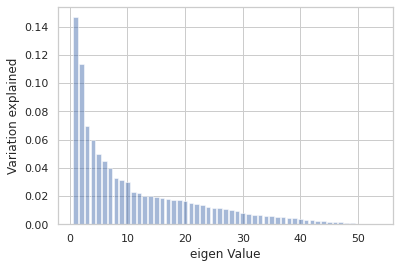

In [144]:
plt.bar(list(range(1,54)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

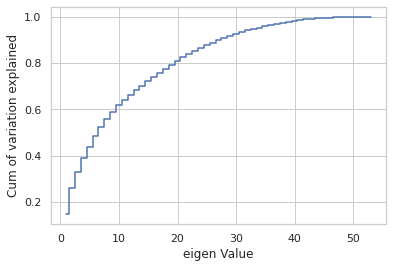

In [145]:
plt.step(list(range(1,54)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

PCA Dimensionality Reduction:

In [146]:
pca10 = PCA(n_components=10)
pca10.fit(X_ZScaled)
print(pca10.components_)
print(pca10.explained_variance_ratio_)
Xpca10 = pca10.transform(X_ZScaled)

[[ 1.14108131e-01 -2.84731239e-02 -1.15414738e-02 -9.16329741e-03
  -1.05969285e-02 -1.01523842e-01 -2.01499698e-01 -1.84379182e-01
   6.11075220e-03 -1.67928752e-01  9.46651020e-02  1.92356074e-01
   1.86631074e-01  1.81386472e-01  1.18288670e-01  9.25438286e-02
   2.09973995e-01 -6.81546548e-02  2.59859656e-02  8.74543509e-02
  -1.25429029e-02  2.86907192e-02 -7.87704435e-02  2.00343195e-01
  -4.20787005e-03  4.26629247e-02  3.14327374e-02 -3.96829111e-02
   1.13090111e-02  3.58441234e-02 -2.02320317e-01  1.75707673e-01
  -2.81928366e-01  6.38756338e-02  1.72455915e-01  2.12317930e-01
   2.09490595e-01  1.20890694e-01  1.42023163e-01  1.42921939e-01
  -2.53269449e-01 -2.85322248e-02  6.89667755e-02 -2.16557223e-01
   1.45640408e-01  2.30558139e-01 -1.11889976e-02 -1.19156985e-02
   1.67379631e-01 -1.12418945e-01  7.73401823e-02  1.20999230e-01
   2.10805728e-01]
 [-1.15653118e-01  3.60020988e-02  1.27569591e-02  1.80639184e-02
   2.49799691e-02  1.70860635e-02  1.21660880e-01  1.6250

In [147]:
import pandas as pd
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA

# load dataset
#iris = datasets.load_iris()
#df = pd.DataFrame(iris.data, columns=iris.feature_names)

# normalize data
#from sklearn import preprocessing
#data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 
data_scaled=dfMPF3
# PCA
pca = PCA(n_components=10)
pca.fit_transform(data_scaled)

# Dump components relations with features:
print(pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10']))

               year     currcrsis      sovcrsis    multicrsis     fincrisis  \
PC-1   6.856762e-13 -2.803951e-15 -1.323652e-15 -1.009279e-15  8.333881e-15   
PC-2   3.099853e-13  5.452143e-15 -9.353872e-17 -2.332964e-16  3.133401e-15   
PC-3   1.249684e-10  1.116880e-13  3.264056e-14  2.205487e-14 -7.330668e-13   
PC-4   1.624884e-09 -5.073090e-12 -1.461482e-12 -1.561026e-12 -1.708644e-11   
PC-5  -7.582240e-09 -3.394179e-11 -8.601625e-12 -1.402404e-12 -1.029313e-10   
PC-6   5.624031e-09 -3.990971e-10 -1.791012e-10 -4.628158e-10 -9.675201e-10   
PC-7   2.691983e-07  2.693139e-09  8.323550e-10  1.155271e-09  6.735885e-09   
PC-8  -1.089629e-07  6.822897e-10  5.310491e-10  1.734476e-09 -2.671955e-09   
PC-9   1.308062e-06  2.554294e-09  1.532970e-09 -6.165766e-10 -4.633200e-09   
PC-10 -5.174034e-07 -1.653014e-08 -5.210965e-09 -8.603151e-09 -2.132566e-08   

           incomgrp     ruralgrow     urbangrow      agriland      frstrent  \
PC-1   1.771592e-14 -2.320568e-13 -2.368784e-13  2.

In [148]:
dfMPF3.shape

(5400, 53)

In [149]:
print(Xpca10)

[[-0.43764424 -1.16431606  0.88452673 ... -0.25023372  0.44101866
   0.52644335]
 [-2.23821507  0.17124911  1.08165561 ... -0.79435415  0.59588788
   0.90391358]
 [ 0.3621509  -0.92959    -0.32256939 ... -0.07284182  0.41427582
   0.2396189 ]
 ...
 [-3.20076504  0.76301819 -1.80771783 ... -1.42027476  0.17065711
   0.66587855]
 [-3.06594109  1.65958537  0.13022448 ... -0.6183845  -0.0266942
  -0.38320989]
 [ 1.32239364 -2.2402431  -0.38198511 ...  0.52248875  0.51691319
   0.31828986]]


In [150]:
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors=5)
#classifier.fit(X_train, y_train.values.ravel())
#y_pred = classifier.predict(X_test)

#print(classification_report(y_test, y_pred))
classifier1 = KNeighborsClassifier(n_neighbors=5)
classifier1.fit(Xpca10, y_train.values.ravel())
##y_pred123 = classifier1.predict(X_test)

#print(classification_report(y_test, y_pred123))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [151]:
pca.components_

array([[ 6.85676240e-13, -2.80395137e-15, -1.32365226e-15,
        -1.00927871e-15,  8.33388100e-15,  1.77159179e-14,
        -2.32056823e-13, -2.36878416e-13,  2.71435996e-13,
        -4.47722442e-13, -4.60021650e-14,  4.39055977e-08,
         9.73009585e-01,  3.90118011e-09,  4.73944449e-13,
        -1.42994984e-14,  1.11589412e-12, -8.24474685e-13,
        -3.34744512e-13, -2.31500557e-12, -3.66416529e-12,
        -2.32088057e-13,  9.35700923e-13,  1.31250096e-11,
        -2.39357230e-07,  1.43217157e-08,  2.30651823e-01,
        -5.70341431e-13, -9.32318038e-12, -5.96503016e-12,
        -1.57388978e-13,  2.95722819e-07, -3.51205647e-12,
         8.86836947e-13,  4.04277918e-07,  5.60955405e-07,
         1.09317735e-06,  1.30063634e-12,  1.71207166e-12,
         1.60675550e-12, -6.03385077e-12, -3.09695961e-13,
         7.93789192e-12, -4.17527575e-12,  1.32463900e-05,
         2.40694373e-05, -4.89519864e-12, -4.31711065e-12,
         1.15075112e-12, -1.20963880e-12,  1.61457221e-1

In [152]:
Xpca10

array([[-0.43764424, -1.16431606,  0.88452673, ..., -0.25023372,
         0.44101866,  0.52644335],
       [-2.23821507,  0.17124911,  1.08165561, ..., -0.79435415,
         0.59588788,  0.90391358],
       [ 0.3621509 , -0.92959   , -0.32256939, ..., -0.07284182,
         0.41427582,  0.2396189 ],
       ...,
       [-3.20076504,  0.76301819, -1.80771783, ..., -1.42027476,
         0.17065711,  0.66587855],
       [-3.06594109,  1.65958537,  0.13022448, ..., -0.6183845 ,
        -0.0266942 , -0.38320989],
       [ 1.32239364, -2.2402431 , -0.38198511, ...,  0.52248875,
         0.51691319,  0.31828986]])

In [153]:
#print(classification_report(y_test,Predictions))

In [154]:
classifier1.score(Xpca10,y_train.values.ravel())

0.9854166666666667

In [155]:
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       976
           1       0.45      0.10      0.16       104

    accuracy                           0.90      1080
   macro avg       0.68      0.54      0.55      1080
weighted avg       0.87      0.90      0.87      1080



In [156]:
X_train.head()

,year,currcrsis,sovcrsis,multicrsis,fincrisis,incomgrp,ruralgrow,urbangrow,agriland,frstrent,co2dmg,ch4emis,gdp,gdpcap,mva,co2gdp,co2cap,resrent,xforstrt,export,import,fdi,ppgdbtgdp,pngdbtgdp,xrate,gdpconst,cpi,remit,gdpdef,trade,popgrow,agrilandkm,agedep,arable,aquacul,capfish,fisheries,crop,livestock,food,infmort,cropland,popdens,ruralpct,rural,urban,inflatgdp,inflatcpi,gds,exp,gcf,indva,co2dmgusd
1572,2004,0,0,0,0,1,0.869283,0.117071,71.162791,1.760595,0.659548,1201.28,3.974250e+09,3250.400,33.939147,0.289498,0.940984,2.859433,1.098838,68.626979,75.555654,2.511911,52.849227,29.425,6.459693,27.451,131.714,2.988990,20.422,144.182633,0.702060,12240.0,83.714922,10.348837,2931.5,60.00,60.00,98.55,90.50,96.64,81.7,0.813953,63.665872,77.834,852324.0,242729.0,3.871288,3.445335,7.435774,106.928675,19.376173,39.824848,1.828720e+07
1558,1990,0,0,0,0,1,2.888750,5.382653,71.976744,5.331635,0.318597,1134.11,2.616063e+09,2720.030,31.421553,0.181553,0.493830,5.811903,0.480268,59.021252,68.880530,2.701021,52.849227,29.425,2.587321,18.069,40.647,10.121000,9.988,127.901782,3.387581,12380.0,102.361744,10.465116,45.0,65.00,110.00,99.03,87.32,91.12,52.0,0.697674,50.079826,79.798,687358.0,174015.0,30.384907,13.092290,5.254773,109.859278,15.114051,36.828493,3.739447e+06
4880,2000,0,0,0,0,1,-0.069137,1.604179,61.476571,0.096896,1.406357,6883.29,3.253923e+10,3004.610,16.155851,0.683639,2.054068,3.291816,3.194921,39.546704,42.909222,3.496083,60.674160,29.425,1.370683,41.714,71.961,3.706730,23.329,82.455926,0.989028,95510.0,56.901267,18.434604,1553.0,94670.83,96223.83,78.76,100.33,84.61,26.3,13.684346,62.430465,36.568,3546802.0,6152395.0,3.283340,2.962308,22.719845,103.362518,26.082702,26.652465,2.886515e+08
3066,1986,0,0,0,0,3,5.320855,7.890206,43.540518,6.880557,0.336802,3263.14,3.101729e+09,364.303,13.277253,0.199328,0.072616,6.880557,0.000000,22.910709,25.048799,-0.247538,101.243000,6.200,1.861073,416.211,0.429,1.120250,40.153,47.959508,5.585012,41050.0,99.403226,22.804412,188.0,72670.00,72858.00,47.77,60.50,48.04,146.3,1.219771,80.879349,89.600,6832273.0,793032.0,13.509284,14.046868,10.331835,102.138091,12.469926,19.346493,3.782264e+06
3747,1983,0,0,0,0,0,1.621498,4.585188,36.320161,2.279322,0.782501,13433.60,8.781272e+09,2269.190,13.361895,0.179980,0.408409,2.279322,0.000000,30.180805,36.380550,0.093557,21.727200,21.650,126.000000,64565.414,1.896,0.633898,72.350,67.321689,2.900279,144300.0,84.189819,4.580921,2931.5,3500.00,3500.00,47.81,46.22,42.87,45.6,0.276869,8.723365,56.488,1957757.0,1508036.0,14.435833,13.433756,19.011666,103.918542,22.488054,25.978425,8.116225e+06


By reducing the dimensionality we increased the percentage prediction by 6.5%.

##LOGISTIC REGRESSION PCA

In [157]:
# split the data into test train sets
from sklearn.model_selection import train_test_split
# create training and testing vars
#X_train, X_test, y_train, y_test = train_test_split(dfMPF3, y, test_size=0.3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(dfMPF3, y, test_size=0.50, random_state=1, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2700, 53) (2700, 1)
(2700, 53) (2700, 1)


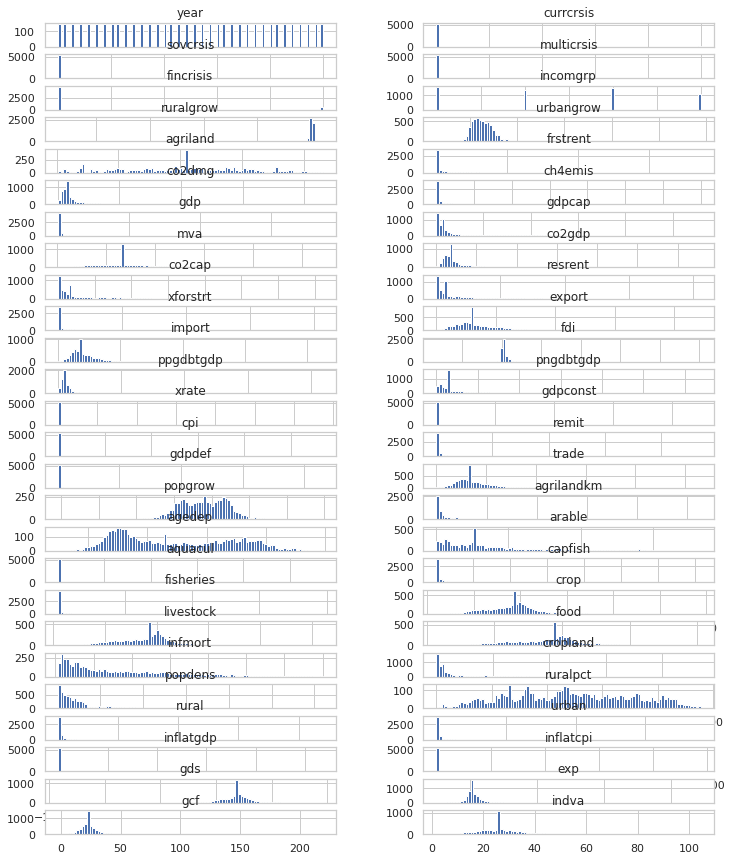

In [158]:
columns = list(dfMPF3)[0:-1] 
dfMPF3[columns].hist(stacked=True, bins=100, figsize=(12,30), layout=(52,2)); 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5cffc9210>,
      dtype=object)

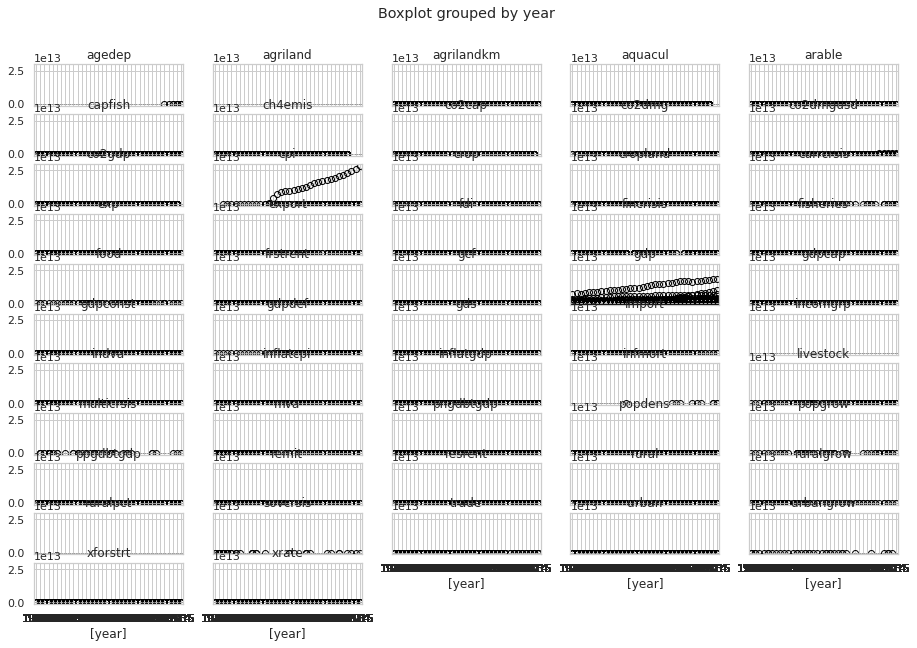

In [159]:
dfMPF3.boxplot(by='year', layout = (11,5),figsize=(15,10))

In [160]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
logisticRegressionmodel = LogisticRegression(solver="liblinear")
logisticRegressionmodel.fit(X_train, y_train)
#predict on test
y_predict = logisticRegressionmodel.predict(X_test)


coef_df = pd.DataFrame(logisticRegressionmodel.coef_)
coef_df['intercept'] = logisticRegressionmodel.intercept_
print(coef_df)

              0             1             2             3             4  \
0 -5.808795e-11 -5.318026e-16 -7.565396e-17  6.111128e-16  4.412127e-15   

              5             6             7             8             9  \
0 -4.056545e-14 -2.231665e-14 -7.646379e-14 -1.188864e-12 -7.464897e-14   

             10            11            12            13            14  \
0 -3.745110e-14 -1.096059e-10  6.552813e-13 -2.322228e-10 -3.618613e-13   

             15            16            17            18            19  \
0 -1.548980e-14 -9.515718e-14 -2.103691e-13 -1.199658e-13 -1.088531e-12   

             20            21            22            23            24  \
0 -1.363012e-12 -1.042771e-13 -1.783824e-12 -1.181518e-12 -1.107787e-09   

             25            26            27            28            29  \
0 -1.708789e-10  3.445549e-13 -1.321141e-13 -4.952515e-12 -2.449089e-12   

             30            31            32            33            34  \
0 -4.761776e-14 -2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [161]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2461
           1       0.06      0.01      0.01       239

    accuracy                           0.90      2700
   macro avg       0.49      0.50      0.48      2700
weighted avg       0.84      0.90      0.87      2700



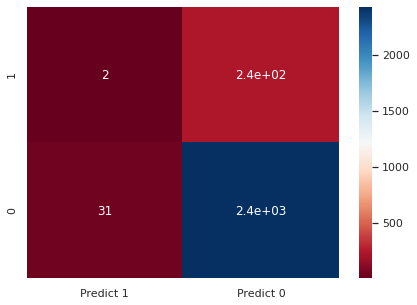

In [162]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,  cmap='RdBu',annot=True)

Try converting to Z-Score

In [163]:
from scipy.stats import zscore

XTrainScaled  = X_train.apply(zscore)  # convert all attributes to Z scale 

XTrainScaled.describe()

X_testScaled  = X_test.apply(zscore)


In [164]:
# Fit the model on train
logisticRegressionmodelZ = LogisticRegression(solver="liblinear")
logisticRegressionmodelZ.fit(XTrainScaled, y_train)
#predict on test
y_predictScaled = logisticRegressionmodelZ.predict(X_testScaled)


coef_df = pd.DataFrame(logisticRegressionmodelZ.coef_)
coef_df['intercept'] = logisticRegressionmodelZ.intercept_
print(coef_df)

          0         1         2        3         4        5         6  \
0  0.107473 -1.813441 -0.945553  1.42103  3.633039 -0.09623 -0.262913   

          7         8         9        10       11        12        13  \
0  0.017134 -0.006222  0.129933  0.124707  0.22971 -0.098027 -0.010285   

         14        15        16        17        18        19        20  \
0  0.020505  0.004822 -0.073845 -0.038927 -0.018744 -0.006267 -0.010794   

         21        22        23        24        25        26        27  \
0 -0.091551 -0.097216  0.214052 -0.005576 -0.042505 -0.047888  0.040354   

         28        29        30        31        32        33        34  \
0 -0.024867 -0.033992  0.061675 -0.015226  0.131352  0.061587 -0.099132   

         35        36        37        38        39        40        41  \
0  0.049947 -0.042736  0.058367 -0.036466 -0.119457  0.011513  0.029436   

         42        43        44        45        46        47        48  \
0 -0.007459 -0.151519 -0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [165]:
print(classification_report(y_test, y_predictScaled))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2461
           1       1.00      0.98      0.99       239

    accuracy                           1.00      2700
   macro avg       1.00      0.99      0.99      2700
weighted avg       1.00      1.00      1.00      2700



After converting to Zscore, it has become more overfit.

### KNN 

In [166]:
# create training and testing vars
#X_train, X_test, y_train, y_test = train_test_split(dfMPF3, y, test_size=0.3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(dfMPF3, y, test_size=0.50, random_state=1, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2700, 53) (2700, 1)
(2700, 53) (2700, 1)


In [167]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [168]:

NNH.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [169]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8874074074074074

Confusion Matrix


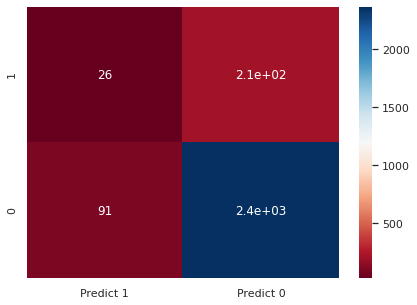

In [170]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,cmap='RdBu', cbar=True)

#### Choosing the K-Value
Choosing the right k is not easy and is subjective. Usually choose as an odd number is chosen.

A small k captures too much training noise and hence does not do well in test data. A very large k does so much smoothening that it does not manage to capture information in the training data sufficiently - and hence does not do well in test data.

If the number of classes is 2, many suggest a rule of thumb approach(set k=sqrt(n)), that might not be the best but does well mostly.

In [171]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


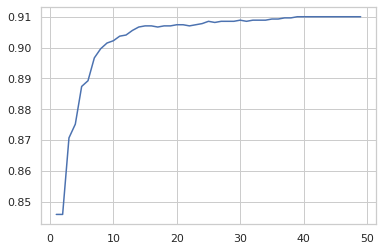

In [172]:
plt.plot(range(1,50),scores)

### SVM

In [173]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(dfMPF3, y, test_size=0.3, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3780, 53) (3780, 1)
(1620, 53) (1620, 1)


In [174]:
from sklearn import svm

In [175]:
svmModel = svm.SVC(gamma=0.025, C=3)

In [176]:
svmModel.fit(X_train , y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [177]:
y_pred = svmModel.predict(X_test)

In [178]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [179]:
y_grid = (np.column_stack([y_test, y_pred]))

In [180]:
print(y_grid)


[[1 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Confusion Matrix


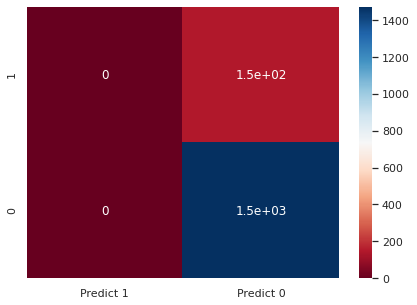

In [181]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,cmap='RdBu', cbar=True)

### Featurization_Model Selection_Tuning for logisticRegressionmodel


In [182]:
logisticRegressionmodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [183]:
intercept = logisticRegressionmodel.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2.908163334389654e-14


Create a regularized RIDGE model and note the coefficients

In [184]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 1.26810190e-05 -9.74730204e-01 -9.11709056e-01  1.02814013e+00
   9.89177675e-01  9.72146213e-06 -4.53318468e-06 -5.12588562e-05
  -3.14439848e-05  6.41946569e-05  5.74512518e-04  1.65406803e-08
  -3.53640789e-15  9.12474753e-08  1.02862788e-05 -2.11485665e-04
   1.99439753e-05 -2.81125949e-05 -1.09255330e-05  1.12499791e-04
   1.83755539e-05  3.53572550e-05 -1.03121302e-05 -9.33888681e-06
   1.03106060e-13 -1.98477457e-09 -1.16894463e-15  1.67175832e-05
   1.01748613e-08 -7.15195158e-05 -5.16139930e-04  1.52334684e-09
   9.83655467e-05 -1.86367785e-05 -1.57725267e-09  8.98387170e-10
  -5.67311154e-11 -5.30747546e-05 -1.24142369e-05  5.10333916e-05
  -1.76783584e-05  6.35881239e-05  8.06762072e-06 -5.09828242e-06
  -6.30846971e-11  1.36429894e-10 -3.88480461e-07 -5.29032068e-07
   4.22638598e-05  7.17288297e-05 -1.12480577e-05 -2.29182885e-05
   9.47668081e-14]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.50916e-27): result may not be accurate.
  overwrite_a=True).T


Create a regularized LASSO model and note the coefficientsa


In [185]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  1.60751799e-08
 -2.59532451e-14 -8.27356912e-07  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  2.69095094e-04  1.20862851e-03
 -1.44264295e-11  7.04965664e-09 -9.00024531e-15 -0.00000000e+00
  7.14347394e-07 -6.17084943e-05 -0.00000000e+00  2.01341221e-08
 -0.00000000e+00  7.66180623e-04  2.85922748e-09  9.73121947e-09
 -1.45363503e-08 -5.98936972e-04 -0.00000000e+00 -2.80045707e-04
  4.49130713e-04  0.00000000e+00 -8.13127449e-05 -1.37501420e-04
 -4.67178761e-10  1.16989591e-09  4.51591888e-05 -4.99891219e-06
 -0.00000000e+00 -0.00000000e+00 -1.01199369e-03  0.00000000e+00
  9.50948628e-13]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142.20028250663998, tolerance: 0.030119047619047604
  positive)


Let us compare their scores

In [186]:
print(logisticRegressionmodel.score(X_train, y_train))
print(logisticRegressionmodel.score(X_test, y_test))

0.9047619047619048
0.8969135802469136


In [187]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9913898152191704
0.9762359252072416


In [188]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.06790886243748717
0.06901200043532207


Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [189]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)


In [190]:
from sklearn import preprocessing


X_scaled = preprocessing.scale(dfMPF3)
X_scaled = pd.DataFrame(X_scaled, columns=dfMPF3.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [191]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(3780, 1432)

In [192]:
logisticRegressionmodel.fit(X_train, y_train)
print(logisticRegressionmodel.coef_[0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[-1.23379502  0.03990382  0.1399274  ... -0.01643726  0.00417979
 -0.01326441]


In [193]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.00000000e+00  8.77582415e-04 -2.85766627e-03 ...  1.79509591e-05
   1.06888463e-04 -2.04101011e-04]]


In [194]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9999997161420334
0.9634822606720037


In [195]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.  0. -0. ...  0. -0. -0.]


In [196]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))


0.9910134708295755
0.9884085091331359
